In [122]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction import image
import os
from collections import defaultdict

### Create Dummy Image

In [2]:
dimensions = np.array([100, 100, 2])
dumb_image = np.arange(dimensions.prod()).reshape(tuple(dimensions.tolist()))

In [3]:
dumb_image[:,:,0]

array([[    0,     2,     4, ...,   194,   196,   198],
       [  200,   202,   204, ...,   394,   396,   398],
       [  400,   402,   404, ...,   594,   596,   598],
       ..., 
       [19400, 19402, 19404, ..., 19594, 19596, 19598],
       [19600, 19602, 19604, ..., 19794, 19796, 19798],
       [19800, 19802, 19804, ..., 19994, 19996, 19998]])

In [4]:
print dumb_image[1,0,0]
print dumb_image[0,1,0]
print dumb_image[0,0,1]

200
2
1


**RESULT: First Index Controls Matrix, Second Is Row, Third is Column**

### Divide into Patches

In [5]:
patches = image.extract_patches_2d(dumb_image, patch_size=(2, 2), max_patches=None, random_state=0)
patches.shape

(9801, 2, 2, 2)

**Note: If `max_patches` is set to a number `n` and not `None` then the method with extract `n` random patches from the maximum total possible.**

In [6]:
reconstructed = image.reconstruct_from_patches_2d(patches, tuple(dimensions.tolist()))

In [7]:
print "Error Message: {}".format(np.testing.assert_array_equal(dumb_image, reconstructed))
reconstructed

Error Message: None


array([[[  0.00000000e+00,   1.00000000e+00],
        [  2.00000000e+00,   3.00000000e+00],
        [  4.00000000e+00,   5.00000000e+00],
        ..., 
        [  1.94000000e+02,   1.95000000e+02],
        [  1.96000000e+02,   1.97000000e+02],
        [  1.98000000e+02,   1.99000000e+02]],

       [[  2.00000000e+02,   2.01000000e+02],
        [  2.02000000e+02,   2.03000000e+02],
        [  2.04000000e+02,   2.05000000e+02],
        ..., 
        [  3.94000000e+02,   3.95000000e+02],
        [  3.96000000e+02,   3.97000000e+02],
        [  3.98000000e+02,   3.99000000e+02]],

       [[  4.00000000e+02,   4.01000000e+02],
        [  4.02000000e+02,   4.03000000e+02],
        [  4.04000000e+02,   4.05000000e+02],
        ..., 
        [  5.94000000e+02,   5.95000000e+02],
        [  5.96000000e+02,   5.97000000e+02],
        [  5.98000000e+02,   5.99000000e+02]],

       ..., 
       [[  1.94000000e+04,   1.94010000e+04],
        [  1.94020000e+04,   1.94030000e+04],
        [  1.940400

### SciPy Image Manipulation

In [8]:
from scipy import misc
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
f = misc.face()
misc.imsave('face.png', f)

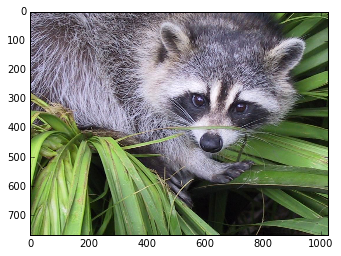

In [10]:
plt.imshow(f)

In [11]:
face = misc.imread('face.png')
type(face)

numpy.ndarray

In [12]:
print face.shape
print face.dtype

(768, 1024, 3)
uint8


**from scipy: "dtype is uint8 for 8-bit images (0-255)"**

In [14]:
# plt.imshow(dumb_image)

### Read in a Real Photo

In [15]:
image_from_file = np.fromfile('../data/images/LANDSCAPE/7138753@N04_22141348876.jpg', dtype=np.uint8)

In [16]:
image_from_file.reshape((-1, -1, 3))

ValueError: can only specify one unknown dimension

**Above method requires you know picture size. Use below:**  
**Note: if reading in lots of pictures produces memory issues, explore the np.memmap() function.**

In [110]:
image_from_file = misc.imread('../data/images/LANDSCAPE/100088253@N05_20290148365.jpg')
image_from_file.shape

(1066, 1600, 3)

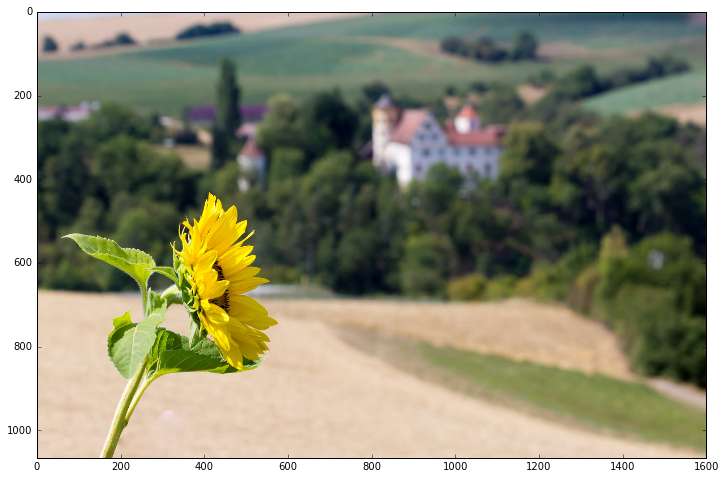

In [111]:
plt.figure(figsize=(12,12))
plt.imshow(image_from_file)

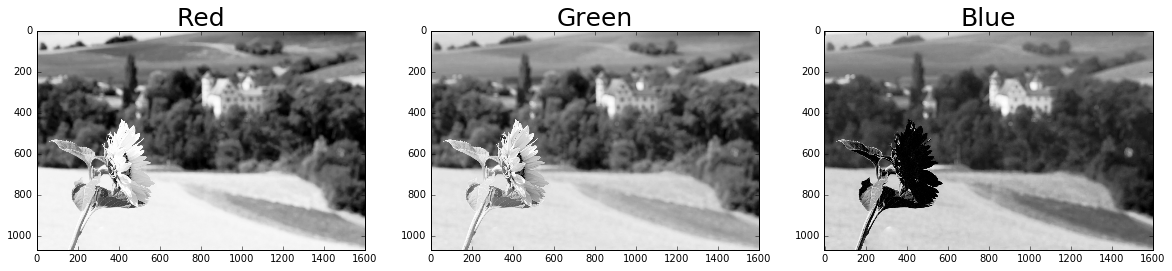

In [112]:
red = image_from_file[:,:,0].astype(int)
green = image_from_file[:,:,1].astype(int)
blue = image_from_file[:,:,2].astype(int)


f, (ax1, ax2, ax3) = plt.subplots(1, 3)
f.set_size_inches(20, 20)
ax1.imshow(red, cmap="Greys_r")
ax2.imshow(green, cmap="Greys_r")
ax3.imshow(blue, cmap="Greys_r")
ax1.set_title("Red", fontdict={'fontsize':25})
ax2.set_title("Green", fontdict={'fontsize':25})
ax3.set_title("Blue", fontdict={'fontsize':25})
plt.show()

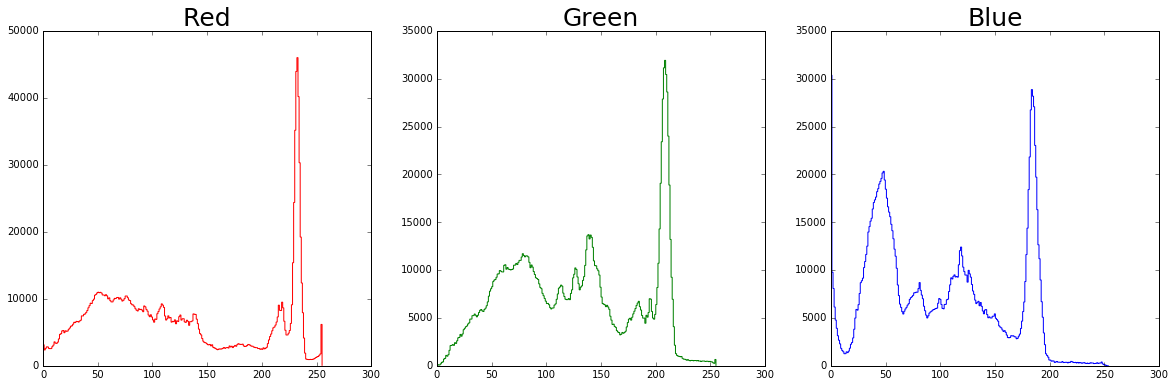

In [113]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3)
f.set_size_inches(20, 6)
ax1.hist(red.flatten(), bins=255, color='r', histtype='step')
ax2.hist(green.flatten(), bins=255, color='g', histtype='step')
ax3.hist(blue.flatten(), bins=255, color='b', histtype='step')
ax1.set_title("Red", fontdict={'fontsize':25})
ax2.set_title("Green", fontdict={'fontsize':25})
ax3.set_title("Blue", fontdict={'fontsize':25})
#plt.legend(handles=[red_hist, blue_hist, green_hist])
plt.show()

In [147]:
def get_counts(color_array):
    values, counts = np.unique(color_array.flatten(), return_counts=True)
    tracker = defaultdict(int)
    for value, count in zip(values, counts):
        tracker[value] = count
    limits = range(0,256)
    holder = np.array(limits)
    for idx in limits:
        holder[idx] = tracker[idx]
    return holder

In [142]:
def read_image(filename):
    image_array = misc.imread(filename)
    return image_array

def get_rgb_arrays(image_array):
    red = image_array[:,:,0].astype(float)
    green = image_array[:,:,1].astype(float)
    blue = image_array[:,:,2].astype(float)
    red = get_counts(red)
    green = get_counts(green)
    blue = get_counts(blue)
    return red, green, blue  

In [149]:
raw = read_image('../data/images/LANDSCAPE/100088253@N05_20290148365.jpg')
red_counts, green_counts, blue_counts = get_rgb_arrays(raw)

In [157]:
np.concatenate((red_counts, green_counts, blue_counts), axis=0)

array([ 3136,  2369,  2616,  2830,  2806,  2586,  2560,  2576,  2853,
        3083,  3577,  3382,  3350,  3535,  4015,  4701,  4792,  5211,
        5258,  4943,  5221,  5158,  5193,  5460,  5645,  5919,  5970,
        6215,  6503,  6458,  6635,  6613,  6532,  6693,  6805,  7457,
        7446,  7691,  7747,  7978,  8260,  8662,  8984,  9352,  9304,
        9735,  9956, 10555, 10669, 10886, 10990, 10917, 10974, 10865,
       10581, 10574, 10460, 10622, 10449,  9999, 10149,  9728,  9545,
        9542,  9837, 10072, 10042, 10187, 10207,  9962, 10157,  9948,
        9670,  9790, 10031, 10418, 10424, 10167,  9819,  9745,  9272,
        9114,  9069,  8832,  8517,  8298,  8188,  8522,  8395,  8439,
        8327,  8078,  8939,  8807,  8424,  8163,  7577,  7333,  7619,
        7289,  6852,  6513,  6984,  6938,  7776,  8099,  8487,  8805,
        9251,  9064,  8720,  7440,  6835,  7024,  7458,  7149,  7215,
        6519,  6635,  6585,  6861,  6279,  6719,  6613,  7338,  7583,
        6821,  7025,

In [159]:
directory = "../data/images/LANDSCAPE/"
file_names = os.listdir(directory)
store = np.zeros((len(file_names), 256*3))
for i, name in enumerate(file_names):
    path = directory + name
    raw = read_image(path)
    red_counts, green_counts, blue_counts = get_rgb_arrays(raw)
    single_row = np.concatenate((red_counts, green_counts, blue_counts), axis=0)
    store[i,:] = single_row

IndexError: too many indices for array

**PROBLEM: If the picture is not RGB...fix!**

In [169]:
df = pd.DataFrame(data=store[0:100, :], dtype=int)

In [170]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,20,11,30,61,83,97,103,122,122,140,...,0,0,0,0,0,0,0,0,0,0
1,3136,2369,2616,2830,2806,2586,2560,2576,2853,3083,...,283,292,396,202,121,94,50,7,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,141732,61392,76820,90328,73069,62451,52917,45670,39790,34409,...,299,278,277,245,223,190,197,164,137,868
4,14124,4082,3886,3841,3929,3906,4131,4216,4201,4324,...,5607,4519,3562,3066,2417,1812,1099,926,627,3856


### Start Unsupervised Modeling - Use Cosine Similarity

In [175]:
from sklearn.neighbors import NearestNeighbors